# Employee Retention Classification

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Download the DataSet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Now we have to figure out which columns are directly affecting Rentention.**


*   For that Divide the data into 2 parts
    - One includes all the people who left the company
    - Other includes people in the comapny
*   Then take mean of all the columns for both data.
*   Compare the mean of same column and see which one have the most difference



In [ ]:
left_df = df[df.left == 1]
works_df = df[df.left == 0]

In [ ]:
df.groupby('left').mean()

<ipython-input-59-b0959f325c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

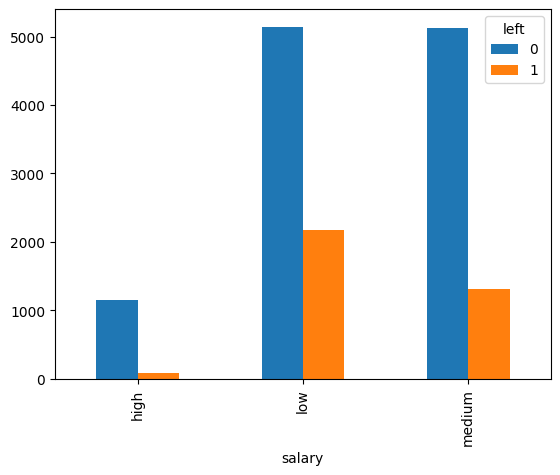

In [ ]:
# Impact of salary on employee retention
pd.crosstab(df.salary, df.left).plot(kind='bar')

**As we can see from here Satisfaction level, Salary, Hours, and promotion affect retentions**

Hence make the DataFrame with only affected values

In [ ]:
sub_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [72]:
df_with_dummies = pd.get_dummies(sub_df.salary, prefix='salary')
df_with_dummies = pd.concat([df_with_dummies, sub_df], axis='columns')
df_with_dummies = df_with_dummies.drop('salary', axis='columns')
df_with_dummies

,salary_high,salary_low,salary_medium,satisfaction_level,average_montly_hours,promotion_last_5years
0,0,1,0,0.38,157,0
1,0,0,1,0.80,262,0
2,0,0,1,0.11,272,0
3,0,1,0,0.72,223,0
4,0,1,0,0.37,159,0
...,...,...,...,...,...,...
14994,0,1,0,0.40,151,0
14995,0,1,0,0.37,160,0
14996,0,1,0,0.37,143,0
14997,0,1,0,0.11,280,0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_with_dummies, df.left, train_size=0.8)

In [74]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
model.score(X_test, y_test)

0.7803333333333333